In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt


In [3]:
def calc_mean_std(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mean = np.mean(image)
    std = np.std(image)
    return mean, std
def calc_euclidean_distance(mean1, std1, mean2, std2):
    distance = np.sqrt((mean1 - mean2)**2 + (std1 - std2)**2)
    return distance




## Step 1 calc the mean and the std for all of the images in each of the 5 folders

In [4]:
folder_path = "C:/Users/gubra/OneDrive/Skrivbord/ping pong/Ex4/People" 
persons = os.listdir(folder_path)

results = []

for person in persons:
    person_folder = os.path.join(folder_path, person)
    image_files = os.listdir(person_folder)

    means = []
    stds = []

    for image_file in image_files:
        image_path = os.path.join(person_folder, image_file)
        mean, std = calc_mean_std(image_path)  # make sure you have defined this function
        means.append(mean)
        stds.append(std)

    person_mean = np.mean(means)
    person_std = np.mean(stds)

    results.append({'Person': person, 'Mean': person_mean, 'Std': person_std})

results_df = pd.DataFrame(results)

print(results_df)

average_of_means = results_df['Mean'].mean()
average_of_stds = results_df['Std'].mean()

print(f"\nThe average of the means is {average_of_means}")
print(f"The average of the stds is {average_of_stds}")



    Person        Mean        Std
0  Andreas  103.914592  43.408818
1    Marie  170.145299  69.703191
2   Mikael  106.672602  45.967704
3   Stefan  174.517589  50.270371
4      Ulf  163.029440  58.296878

The average of the means is 143.6559044551798
The average of the stds is 53.52939241640261


### Step 2 calc the mean and the std for all of the images in the folder test

In [5]:
test_folder_path =  "C:\\Users\\gubra\\OneDrive\\Skrivbord\\ping pong\\Ex4\\Test"

image_files = os.listdir(test_folder_path)
results_dfs = []
for image_file in image_files:
    
    image_path = os.path.join(test_folder_path, image_file)
    mean, std = calc_mean_std(image_path) 
    results_dfs.append({'Image': image_file, 'Mean': mean, 'Std': std})

results_dfss = pd.DataFrame(results_dfs)
print(results_dfss)


   Image        Mean        Std
0  1.png   97.820513  41.440951
1  2.png  153.836004  73.957421
2  3.png  104.131944  45.979199
3  4.png  169.921962  48.441330
4  5.png  165.491738  57.005226


## the distances tabel

In [6]:
from scipy.spatial import distance

test_folder_path =  "C:\\Users\\gubra\\OneDrive\\Skrivbord\\ping pong\\Ex4\\Test"  
test_image_files = os.listdir(test_folder_path)

distances = []

for test_image_file in test_image_files:
    test_image_path = os.path.join(test_folder_path, test_image_file)
    test_mean, test_std = calc_mean_std(test_image_path)

    row = {'Image': test_image_file}

    for _, person in results_df.iterrows(): 
        person_mean = person['Mean']
        person_std = person['Std']
        euclidean_distance = distance.euclidean([test_mean, test_std], [person_mean, person_std])

        row[person['Person']] = euclidean_distance

    distances.append(row)

distances_df = pd.DataFrame(distances)
print(distances_df)


   Image    Andreas      Marie     Mikael     Stefan        Ulf
0  1.png   6.403929  77.650685   9.942383  77.203628  67.352256
1  2.png  58.526614  16.855016  54.843512  31.445259  18.159622
2  3.png   2.579554  70.146923   2.540684  70.516333  60.171756
3  4.png  66.198936  21.263034  63.297712   4.946229  12.026583
4  5.png  63.060346  13.523829  59.845782  11.261628   2.780517


## a scattered plot of the result from step 1

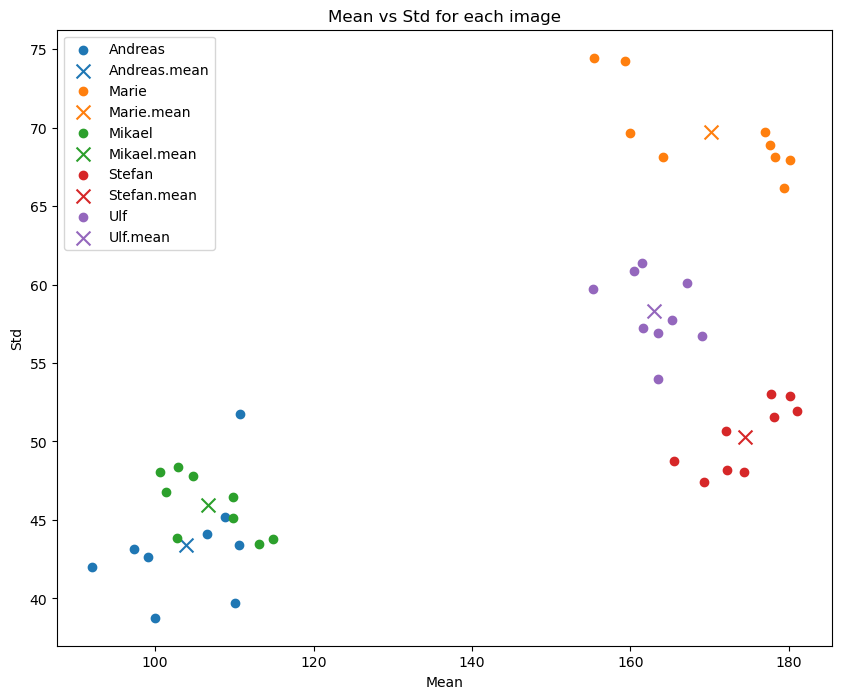

In [14]:
people_folder = "C:/Users/gubra/OneDrive/Skrivbord/ping pong/Ex4/People"
test_folder = "C:\\Users\\gubra\\OneDrive\\Skrivbord\\ping pong\\Ex4\\Test"

people = os.listdir(people_folder)
test_images = os.listdir(test_folder)

means_stds = []

for person in people:
    person_folder = os.path.join(people_folder, person)
    image_files = os.listdir(person_folder)

    person_means = []
    person_stds = []

    for image_file in image_files:
        image_path = os.path.join(person_folder, image_file)
        mean, std = calc_mean_std(image_path)
        means_stds.append({'Person': person, 'Image': image_file, 'Mean': mean, 'Std': std})
        person_means.append(mean)
        person_stds.append(std)

    person_mean = np.mean(person_means)
    person_std = np.mean(person_stds)
    
    means_stds.append({'Person': person + ".mean", 'Image': "Average", 'Mean': person_mean, 'Std': person_std})

means_stds_df = pd.DataFrame(means_stds)


plt.figure(figsize=(10, 8))

colors = plt.cm.tab10(range(len(people)))

for i, person in enumerate(people):
    person_data = means_stds_df[means_stds_df['Person'] == person]
    plt.scatter(person_data['Mean'], person_data['Std'], label=person, color=colors[i])

    mean_data = means_stds_df[means_stds_df['Person'] == person + ".mean"]
    plt.scatter(mean_data['Mean'], mean_data['Std'], label=person + ".mean", color=colors[i], marker='x', s=100)

plt.xlabel('Mean')
plt.ylabel('Std')
plt.title('Mean and Std for each image')
plt.legend()
plt.show()
